<center><h1>Лабораторна робота №2</h1>
<h2>Наука про дані: обмін результатами та початковий аналіз</h2>
<h3>Виконав студент групи ФБ-24 Синеуцький Олександр</h3></center>
<h3>Хід виконання роботи:</h3>
<h4>>Зареєструватись на сайті GitHub</h4>

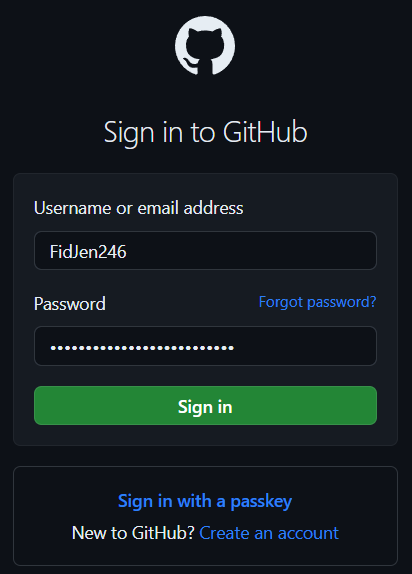

<h4>>Створити репозиторій</h4>

![Знімок екрана 2024-03-05 131451.png](<attachment:Знімок екрана 2024-03-05 131451.png>)

<h4>>Додати в репозиторій код та дані із лабораторної роботи №1 та №2</h4>

![Знімок екрана 2024-03-05 131626.png](<attachment:Знімок екрана 2024-03-05 131626.png>)
![Знімок екрана 2024-03-05 131758.png](<attachment:Знімок екрана 2024-03-05 131758.png>)
![Знімок екрана 2024-03-05 131925.png](<attachment:Знімок екрана 2024-03-05 131925.png>)
![Знімок екрана 2024-03-05 132126.png](<attachment:Знімок екрана 2024-03-05 132126.png>)
![Знімок екрана 2024-03-05 132234.png](<attachment:Знімок екрана 2024-03-05 132234.png>)
![Знімок екрана 2024-03-05 132336.png](<attachment:Знімок екрана 2024-03-05 132336.png>)

<h4>>Створити веб-додаток із використанням модуля Spyre, який дозволить:
<br>--Обрати часовий ряд VCI, TCI, VHI для набору даних із лабораторної роботи 1 (випадаючий список);
<br>--Вибрати область, для якої буде виконуватись аналіз (випадаючий список);
<br>--Зазначити інтервал тижнів, за які відбираються дані;<br>
<br>>Створити кілька вкладок для відображення таблиці із даними на графіку ходу індексів</h4>
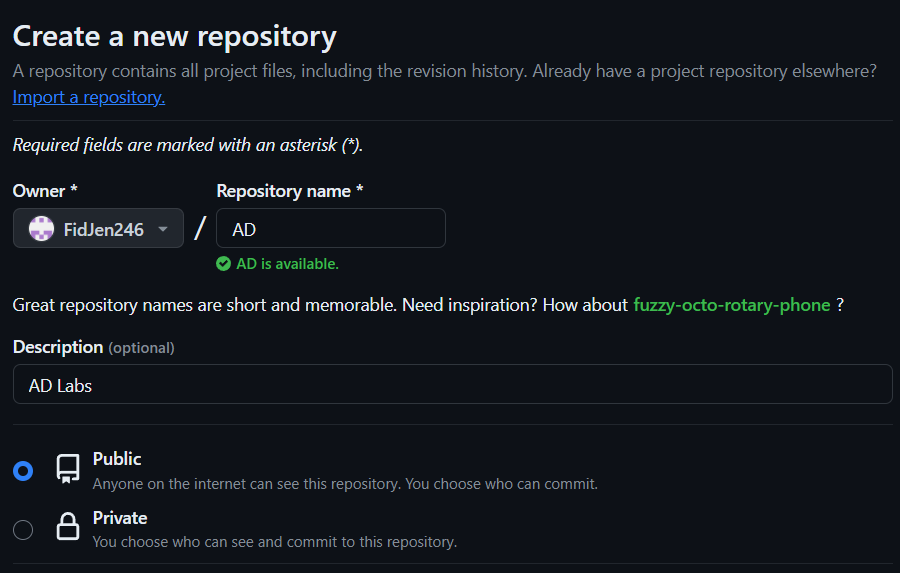
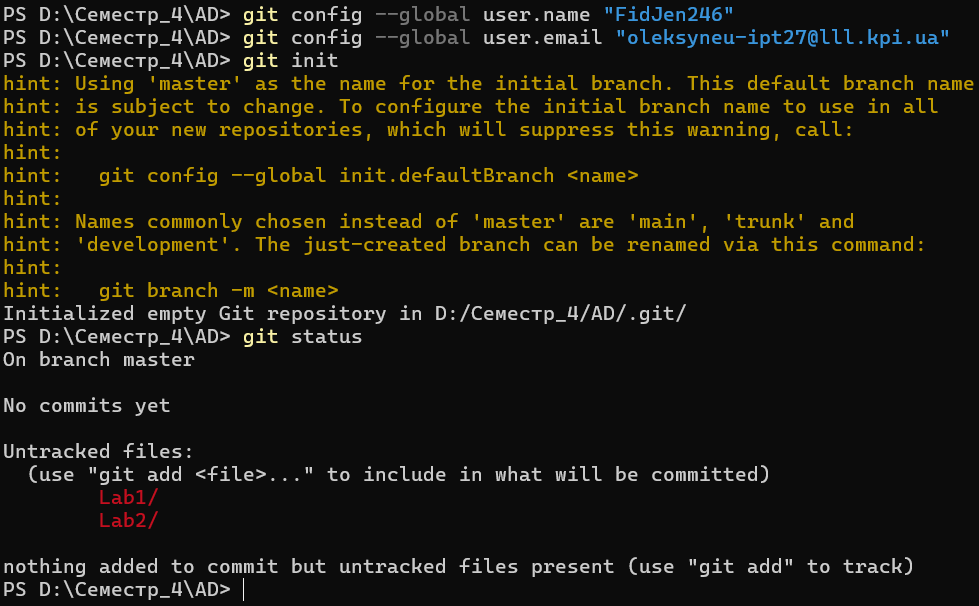
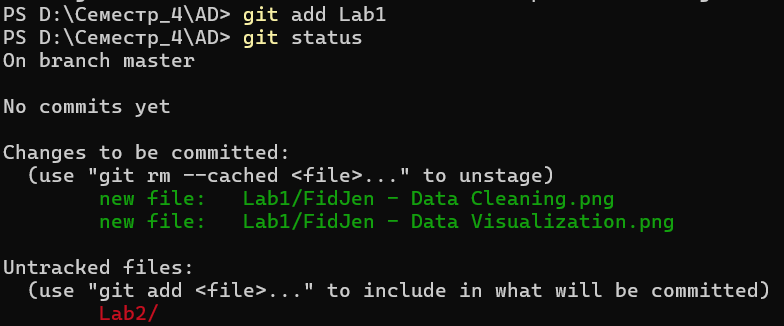
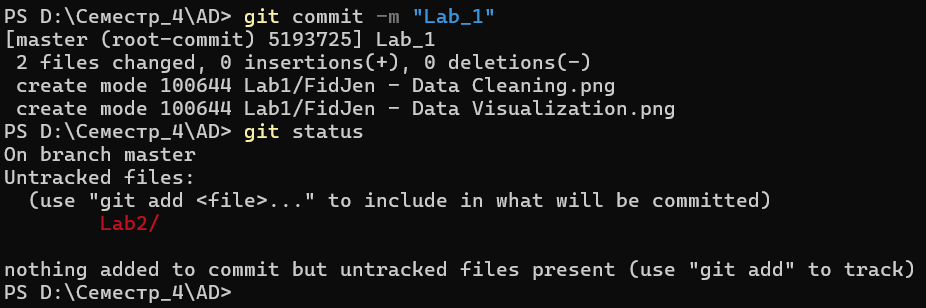
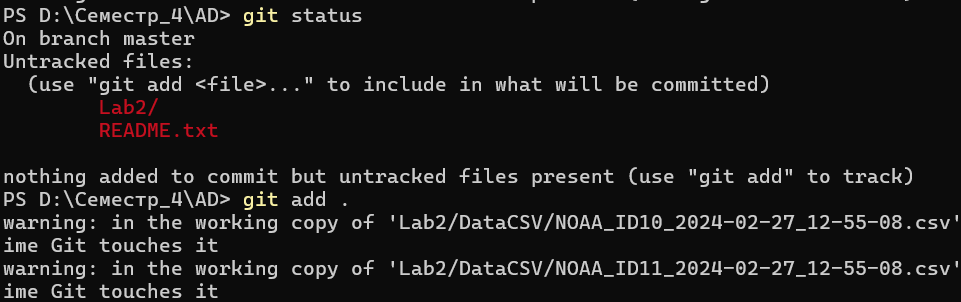
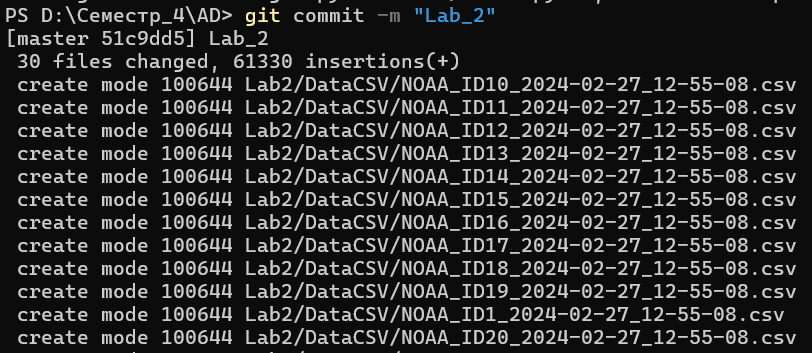
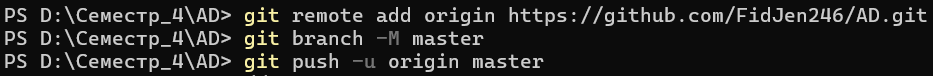

Я використовуватиму частину коду з лабораторної роботи №2, а саме, код, щоб завантажити дані з сайту, та код, щоб очистити дані від сміття 

In [ ]:
import urllib.request
import os
from datetime import datetime

def Download():
    URL = "https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID={}&year1=1981&year2=2024&type=Mean"
    DateAndTime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    if not os.path.exists("./DataCSV"):
        os.makedirs("./DataCSV")

    for ProvinceID in range(1, 28):
        url = URL.format(ProvinceID)
        FileName = f"NOAA_ID{ProvinceID}_{DateAndTime}.csv"
        FilePath = os.path.join("./DataCSV", FileName)

        try:
            urllib.request.urlretrieve(url, FilePath)
        except Exception as e:
            print(f"Помилка при скачуванні файлу для ProvinceID {ProvinceID}: {str(e)}")

    print("Файли успішно скачано.")

if __name__ == "__main__":
    Download()

In [ ]:
import pandas as pd
import os


def clean(DirPath):
    ls = []
    if not os.path.exists(DirPath) or not os.path.isdir(DirPath):
        print(f"Директорії {DirPath} не існує або не є директорією.")
    else:
        files = os.listdir(DirPath)
        for i, file in enumerate(files):
            if file.endswith(".csv"):
                FilePath = os.path.join(DirPath, file)
                df = pd.read_csv(FilePath, index_col=False, header=1)
                df["ID"] = i + 1
                ls.append(df)
        df = pd.concat(ls).drop_duplicates().reset_index(drop=True)
    df = df.rename(columns={" VHI<br>": "VHI"})
    df = df.rename(columns={" SMN": "SMN"})
    df["year"].replace({"<tt><pre>1982": "1982"}, inplace=True)
    df = df.drop(df.loc[df["VHI"] == -1].index)
    df = df.drop(60398)
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    return df


def index_replace(df):
    new_index = {
        1: 22,
        2: 24,
        3: 23,
        4: 25,
        5: 3,
        6: 4,
        7: 8,
        8: 19,
        9: 20,
        10: 21,
        11: 9,
        12: 9,
        13: 10,
        14: 11,
        15: 12,
        16: 13,
        17: 14,
        18: 15,
        19: 16,
        20: 25,
        21: 17,
        22: 18,
        23: 6,
        24: 1,
        25: 2,
        26: 7,
        27: 5,
    }
    df["ID"].replace(new_index, inplace=True)
    return df


Далі код самого застосунку

In [ ]:
from cleaner import clean, index_replace
from spyre import server


class SlidersApp(server.App):
    title = "NOAA data vizualization"

    inputs = [{"type": "dropdown",
                "label": "Оберіть тип індексу для графіку",
                "options": [{"label": "VCI", "value": "VCI"},
                            {"label": "TCI", "value": "TCI"},
                            {"label": "VHI", "value": "VHI"},],
                "key": "data_type",
                "action_id": "update_data"},
            {"type": "dropdown",
                "label": "Оберіть область України:",
                "options": [{"label": "Вінницька", "value": "1"},
                            {"label": "Волинська", "value": "2"},
                            {"label": "Дніпропетровська", "value": "3"},
                            {"label": "Донецька", "value": "4"},
                            {"label": "Житомирська", "value": "5"},
                            {"label": "Закарпатська", "value": "6"},
                            {"label": "Запорізька", "value": "7"},
                            {"label": "Івано-Франківська", "value": "8"},
                            {"label": "Київська", "value": "9"},
                            {"label": "Кіровоградська", "value": "10"},
                            {"label": "Луганська", "value": "11"},
                            {"label": "Львівська", "value": "12"},
                            {"label": "Миколаївська", "value": "13"},
                            {"label": "Одеська", "value": "14"},
                            {"label": "Полтавська", "value": "15"},
                            {"label": "Рівенська", "value": "16"},
                            {"label": "Сумська", "value": "17"},
                            {"label": "Тернопільська", "value": "18"},
                            {"label": "Харківська", "value": "19"},
                            {"label": "Херсонська", "value": "20"},
                            {"label": "Хмельницька", "value": "21"},
                            {"label": "Черкаська", "value": "22"},
                            {"label": "Чернівецька", "value": "23"},
                            {"label": "Чернігівська", "value": "24"},
                            {"label": "Крим", "value": "25"}],
                "key": "province",
                "action_id": "update_data"},
            {"type": "text",
                "label": "Оберіть інтервал тижнів:",
                "key": "weeks",
                "value": "10-30",
                "action_id": "update_data"},
            {"type": "slider",
                "label": "Оберіть рік:",
                "min": 1981,
                "max": 2024,
                "key": "year",
                "action_id": "update_data"}]
    controls = [{"type": "hidden", "id": "update_data"}]

    tabs = ["Plot", "Table"]

    outputs = [{"type": "plot", 
                "id": "plot", 
                "control_id": 
                "update_data", 
                "tab": "Plot"},
            {"type": "table",
                "id": "table_id",
                "control_id": "update_data",
                "tab": "Table",
                "on_page_load": True}]


    def getData(self, params):
        province = params["province"]
        weeks = params["weeks"]
        year = params["year"]
        df = index_replace(clean("./DataCSV"))
        df = df[df["ID"] == int(province)]
        start_week, end_week = map(int, weeks.split("-"))
        df = df[(df["week"] >= start_week) & (df["week"] <= end_week) & (df["year"] == int(year))]
        return df[["year", "week", "SMN", "SMT", "VCI", "TCI", "VHI"]]


    def getPlot(self, params):
        df = self.getData(params)
        data_type = params["data_type"]
        plt_obj = df.plot(x="week", y=data_type)
        return plt_obj.get_figure()


if __name__ == "__main__":
    app = SlidersApp()
    app.launch()


<h4>Код розробленого додатку додати до створено репозиторію</h4>

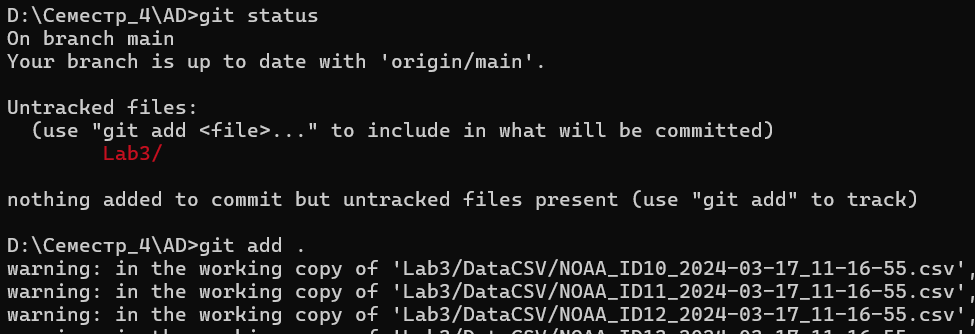
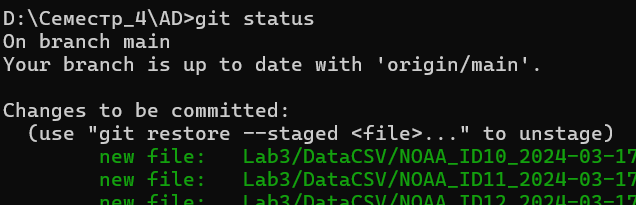
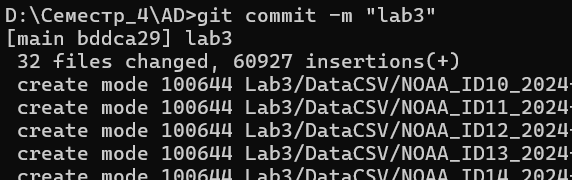
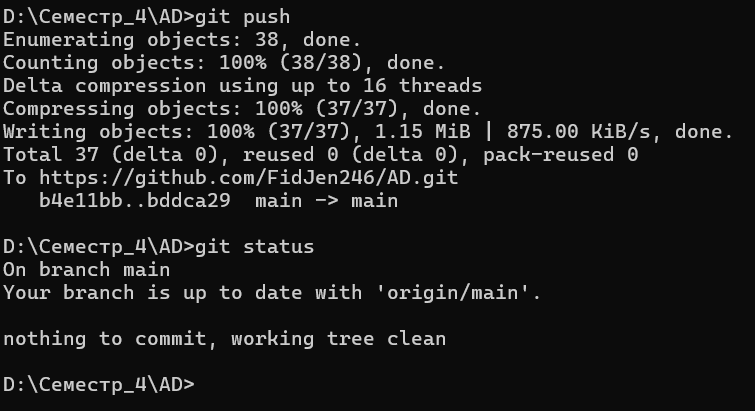